<h1>Thesis Project</h1>

<h3>Data Acquisition & Preprocessing</h3>

In [40]:
import pandas as pd
import numpy as np
import math
import time
import requests
import seaborn as sns
import yfinance as yf
import mplfinance as mpf
import xgboost
from bs4 import BeautifulSoup
from pandas_datareader import data
import pandas_datareader.data as web
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm, tree, linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score, f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, mean_absolute_error, roc_curve, auc, mean_squared_error, mean_absolute_percentage_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
from itertools import combinations_with_replacement, product

In [41]:
def data_acquisition(stocks=["AAPL", "MSFT", "AMZN", "TSLA", "GOOGL", "UNH", "JNJ", "XOM", "JPM", "META", "PG", "NVDA", "V", "HD", "CVX", "MA", "PFE", "LLY", "MRK", "PEP"], start_date="2018-01-01", end_date="2019-12-31"):
    all_stocks_scaled = []

    for stock in stocks:
        response = web.DataReader(stock, data_source='yahoo', start=start_date, end=end_date)

        scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
        names = response.columns
        stock_scaled = scaler.fit_transform(response)
        stock_scaled_df = pd.DataFrame(stock_scaled, columns=names)

        all_stocks_scaled.append(stock_scaled_df)
    
    return all_stocks_scaled

"""microsoft = web.DataReader('MSFT', data_source='yahoo', start="2018-01-01", end="2018-12-31")
amazon = web.DataReader('AMZN', data_source='yahoo', start="2018-01-01", end="2018-12-31")
tesla = web.DataReader('TSLA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
alphabet = web.DataReader('GOOGL', data_source='yahoo', start="2018-01-01", end="2018-12-31")
unitedhealth = web.DataReader('UNH', data_source='yahoo', start="2018-01-01", end="2018-12-31")
johnsonjohnson = web.DataReader('JNJ', data_source='yahoo', start="2018-01-01", end="2018-12-31")
exxon = web.DataReader('XOM', data_source='yahoo', start="2018-01-01", end="2018-12-31")
jpmorgan = web.DataReader('JPM', data_source='yahoo', start="2018-01-01", end="2018-12-31")
meta = web.DataReader('META', data_source='yahoo', start="2018-01-01", end="2018-12-31")
pg = web.DataReader('PG', data_source='yahoo', start="2018-01-01", end="2018-12-31")
nvidia = web.DataReader('NVDA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
visa = web.DataReader('V', data_source='yahoo', start="2018-01-01", end="2018-12-31")
homedepot = web.DataReader('HD', data_source='yahoo', start="2018-01-01", end="2018-12-31")
chevron = web.DataReader('CVX', data_source='yahoo', start="2018-01-01", end="2018-12-31")
mastercard = web.DataReader('MA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
pfizer = web.DataReader('PFE', data_source='yahoo', start="2018-01-01", end="2018-12-31")
abbvie = web.DataReader('ABBV', data_source='yahoo', start="2018-01-01", end="2018-12-31")
elililly = web.DataReader('LLY', data_source='yahoo', start="2018-01-01", end="2018-12-31")
merck = web.DataReader('MRK', data_source='yahoo', start="2018-01-01", end="2018-12-31")"""

'microsoft = web.DataReader(\'MSFT\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\namazon = web.DataReader(\'AMZN\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\ntesla = web.DataReader(\'TSLA\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nalphabet = web.DataReader(\'GOOGL\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nunitedhealth = web.DataReader(\'UNH\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\njohnsonjohnson = web.DataReader(\'JNJ\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nexxon = web.DataReader(\'XOM\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\njpmorgan = web.DataReader(\'JPM\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nmeta = web.DataReader(\'META\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\npg = web.DataReader(\'PG\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nnvidia = web.DataReader(\'NVDA\

In [42]:
stocks = data_acquisition()

In [43]:
"""stocks = [
    apple,
    microsoft,
    amazon,
    tesla,
    alphabet,
    unitedhealth,
    johnsonjohnson,
    exxon,
    jpmorgan,
    meta,
    pg,
    nvidia,
    visa,
    homedepot,
    chevron,
    mastercard,
    pfizer,
    abbvie,
    elililly,
    merck
]"""

'stocks = [\n    apple,\n    microsoft,\n    amazon,\n    tesla,\n    alphabet,\n    unitedhealth,\n    johnsonjohnson,\n    exxon,\n    jpmorgan,\n    meta,\n    pg,\n    nvidia,\n    visa,\n    homedepot,\n    chevron,\n    mastercard,\n    pfizer,\n    abbvie,\n    elililly,\n    merck\n]'

In [44]:
stocks[0].head()

,High,Low,Open,Close,Volume,Adj Close
0,17.929,18.479,17.793,19.853,16.721,17.657
1,19.447,20.309,19.403,19.834,21.389,17.638
2,18.718,20.390,19.410,20.362,13.044,18.144
3,20.000,21.048,20.022,21.662,14.488,19.389
4,20.162,21.645,20.640,21.233,10.845,18.978


In [45]:
def calculate_lines():
    for stock in stocks:
        stock["ShortEMA"] = stock["Close"].ewm(span = 12, adjust = False).mean()
        stock["LongEMA"] = stock["Close"].ewm(span = 26, adjust = False).mean()
        stock["MACD"] = stock["ShortEMA"] - stock["LongEMA"]
        stock["Signal"] = stock["MACD"].ewm(span = 9, adjust = False).mean()
        stock["TypicalPrice"] = (stock["High"] + stock["Low"] + stock["Close"]) / 3
        stock["MA"] = stock["TypicalPrice"].rolling(20).mean()
        stock["MeanDeviation"] = (abs(stock["TypicalPrice"] - stock["MA"])).rolling(20).mean()
        stock["CCI"] = (stock["TypicalPrice"] - stock["MA"]) / (0.015 * stock["MeanDeviation"])
        

In [46]:
calculate_lines()

In [47]:
def calculate_bollinger_bands():
    for stock in stocks:
        stock["30_MA"] = stock["Close"].rolling(window=20).mean()
        stock["30_STD"] = stock["Close"].rolling(window=20).std()
        stock["UpperBollinger"] = stock["30_MA"] + 2 * stock["30_STD"]
        stock["LowerBollinger"] = stock["30_MA"] - 2 * stock["30_STD"]
        stock["DifferenceUpper"] = stock["UpperBollinger"] - stock["Close"]
        stock["DifferenceLower"] = stock["LowerBollinger"] - stock["Close"]

In [48]:
calculate_bollinger_bands()

In [49]:
def upOrDown():
    for stock in stocks:
        stock["UpDown"] = stock["Close"].diff()
        stock["UpDown"] = stock["UpDown"].apply(lambda x: 1 if x >= 0 else 0)

def upOrDownNpArray(array):
    difference = np.diff(array)
    diffReturn = []
    for i in difference:
        if i >= 0:
            diffReturn.append(1)
        else:
            diffReturn.append(0)
    return np.array(diffReturn)

def upOrDownStock(stock):
    stock["UpDown"] = stock["Close"].diff();
    stock["UpDown"] = stock["UpDown"].apply(lambda x: 1 if x >= 0 else 0)

In [50]:
upOrDown()

In [51]:
def calculate_RSI(window=14):
    for stock in stocks:
        delta = stock["Close"].diff()
        up_days = delta.copy()
        up_days[delta<=0]=0.0
        down_days = abs(delta.copy())
        down_days[delta>0]=0.0
        RS_up = up_days.rolling(window).mean()
        RS_down = down_days.rolling(window).mean()
        rsi= 100-100/(1+RS_up/RS_down)
        stock["RSI"] = rsi

In [52]:
calculate_RSI()

In [53]:
def calculate_stochastic_oscillator(window=14):
    for stock in stocks:
        nHigh = stock["High"].rolling(window).max()
        nLow = stock["Low"].rolling(window).min()
        stock["StochasticOscillator"] = ((stock["Close"] - nLow) / (nHigh - nLow)) * 100

In [54]:
calculate_stochastic_oscillator()

In [55]:
stocks[0].head()

,High,Low,Open,Close,Volume,Adj Close,ShortEMA,LongEMA,MACD,Signal,...,CCI,30_MA,30_STD,UpperBollinger,LowerBollinger,DifferenceUpper,DifferenceLower,UpDown,RSI,StochasticOscillator
0,17.929,18.479,17.793,19.853,16.721,17.657,19.853,19.853,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,19.447,20.309,19.403,19.834,21.389,17.638,19.850,19.852,-0.002,-0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,18.718,20.390,19.410,20.362,13.044,18.144,19.929,19.890,0.039,0.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
3,20.000,21.048,20.022,21.662,14.488,19.389,20.196,20.021,0.175,0.041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,20.162,21.645,20.640,21.233,10.845,18.978,20.355,20.111,0.245,0.082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [56]:
def show_corr_matrix(stock):
    corrMatrix = stock[["Close", "RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "LongEMA", "MACD", "CCI"]].corr()


    plt.figure(figsize = (10,10))
    sns.heatmap(corrMatrix, cmap='RdYlGn', center=0, annot=True)
    plt.show()

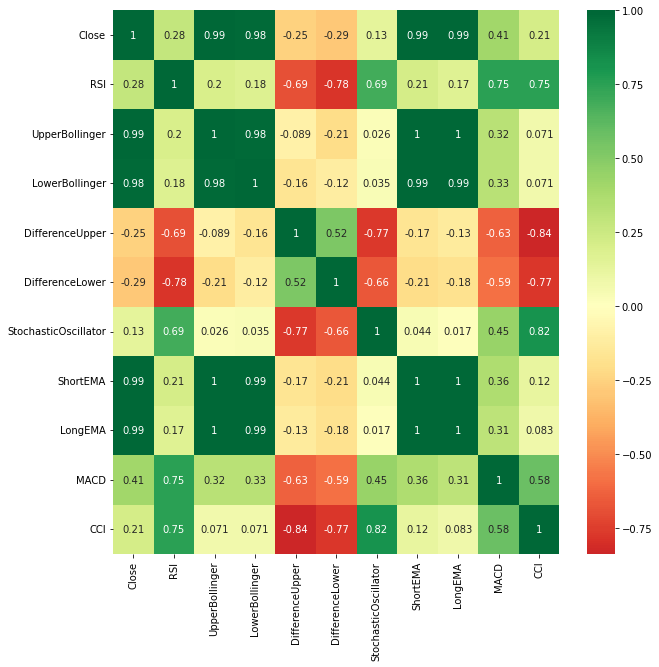

In [57]:
show_corr_matrix(stocks[1])

<h1>Ensemble Algorithms</h1>

<h3>XGBoost Model</h3>

In [58]:
from symbol import parameters
from sklearn import ensemble

def predict_xgboost(stock, feature='close', day_threshold=30):
    stockX = stock[["Close", "RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "MACD", "CCI"]][40:]
    stockY = stock["Close"][40:]

    X = np.array(stockX)
    y = np.array(stockY)
    X = X[:-day_threshold]
    y = y[day_threshold:]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

    """
        Gotta do some kind of random/grid search
    """

    #params = {
    #            "max_depth":[2, 6, 12],
    #            "min_child_weight":[1,5,15],
    #            "learning_rate":[0.3, 0.1, 0.03],
    #            "n_estimators":[100, 300, 500]
    #        }

    #BEST PARAMS:  {'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}

    reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.03, max_depth=2, min_child_weight=5, n_jobs=-1, eval_metric="mape")
    
    #grid_search = GridSearchCV(
    #    estimator=reg,
    #    param_grid=params,
    #    cv = 5,
    #    verbose=4,
    #)

    reg.fit(X_train, y_train)

    #print("BEST PARAMS: ", grid_search.best_params_)

    #y_pred = grid_search.best_estimator_.predict(X_test)

    y_pred = reg.predict(X_test)

    return y_pred, y_test, y_train

In [59]:
predict_xgboost(stocks[0])

(array([37.180004, 37.180004, 38.10581 , 38.10581 , 36.23548 , 36.557045,
        36.39128 , 37.05755 , 37.956257, 37.956257, 32.685024, 36.440224,
        35.990166, 36.260086, 35.990166, 35.76584 , 35.76584 , 35.990166,
        35.76584 , 35.990166, 36.260086, 35.990166, 35.76584 , 36.260086,
        35.76584 , 36.260086, 37.185894, 37.020126, 35.76584 , 36.749058,
        37.797703, 36.973385, 38.432404, 38.870842, 35.76584 , 33.360977,
        35.464066, 35.464066, 35.76584 , 35.76584 , 35.464066, 35.76584 ,
        35.76584 , 35.76584 , 35.76584 , 38.25903 , 38.25903 , 38.65673 ,
        38.25903 , 35.464066, 35.76584 , 35.76584 , 35.76584 , 36.440224,
        36.52588 , 35.76584 , 35.76584 , 38.65673 , 38.65673 , 38.759632,
        38.98396 , 43.35649 , 43.132164, 38.759632, 38.759632, 38.759632,
        43.132164, 38.449997, 36.543472, 35.783432, 35.783432, 35.783432,
        35.783432, 35.783432, 35.783432, 36.543472, 36.093067, 36.093067,
        37.077435, 36.70924 , 35.78343

<h3>Random Forest Model</h3>

In [60]:
def predict_random_forest(stock, feature='close', day_threshold=30):
    stockX = stock[["Close", "RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "MACD", "CCI"]][40:]
    stockY = stock["Close"][40:]

    X = np.array(stockX)
    y = np.array(stockY)
    X = X[:-day_threshold]
    y = y[day_threshold:]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

    """
        Gotta do some kind of random/grid search
    """

    #params = {
    #    'n_estimators': [100, 150, 200, 250, 300],
    #    'max_depth': [3, 5, 7, 10],
    #    'min_samples_split': [2, 5, 10]
    #}

    # BEST PARAMS:  {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}

    reg = ensemble.RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=100)

    #grid_search = GridSearchCV(
    #    estimator=reg,
    #    param_grid=params,
    #    cv = 5,
    #    verbose=4,
    #)

    #grid_search.fit(X_train, y_train)

    #print("BEST PARAMS: ", grid_search.best_params_)

    #y_pred = grid_search.best_estimator_.predict(X_test)

    #print(grid_search.best_estimator_)

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    return y_pred, y_test, y_train

<h1>Regression Algorithms</h1>

<h3>Kernel Ridge Regression Model</h3>

In [61]:
def predict_kernel_ridge(stock, feature='close', day_threshold=30):
    stockX = stock[["RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "MACD", "CCI"]][40:]
    stockY = stock["Close"][40:]

    X = np.array(stockX)
    y = np.array(stockY)
    X = X[:-day_threshold]
    y = y[day_threshold:]

    #params = {
    #    'alpha': [0.25, 0.5, 0.75, 1.0]
    #}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

    reg = KernelRidge(alpha=1.0)

    #grid_search = GridSearchCV(
    #    estimator=reg,
    #    param_grid=params,
    #    cv = 5,
    #    verbose=4,
    #)

    #grid_search.fit(X_train, y_train)

    #print("BEST PARAMS: ", grid_search.best_params_)

    #y_pred = grid_search.best_estimator_.predict(X_test)

    #print(grid_search.best_estimator_)

    
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    return y_pred, y_test, y_train

<h1>Predictions and Plotting</h1>

In [62]:
def switcher(stock, feature, day_threshold, model_name):
    if model_name == "KRR":
        return predict_kernel_ridge(stock, feature, day_threshold)
    elif model_name == "XGBOOST":
        return predict_xgboost(stock, feature, day_threshold)
    elif model_name == "RFR":
        return predict_random_forest(stock, feature, day_threshold)

def predict_plot(stocks, feature='close', day_threshold=[5], model='KRR', confusion_matrix=False, plot=True):
    final_df_metrics = []

    for window in day_threshold:
        final_df_metric = pd.DataFrame()
        for stock in stocks:
            model_name = model.upper()

            y_pred, y_test, y_train = switcher(stock, feature, window, model_name)
            
            y_pred = y_pred[window:]
            y_test = y_test[:-window]
            
            predictUpDown = upOrDownNpArray(y_pred)
            realUpDown = upOrDownNpArray(y_test)
            
            if confusion_matrix:
                plt.figure(figsize = (10,8))

                matrix = confusion_matrix(realUpDown, predictUpDown)
                sns.heatmap(matrix, cmap='RdYlGn', center=0, annot=True)
                
                plt.xlabel('Prediction')
                plt.ylabel('Actual Value')
                plt.title('Confusion Matrix')
                plt.show()

            f_score = f1_score(realUpDown, predictUpDown)
            precision = precision_score(realUpDown, predictUpDown)
            accuracy = accuracy_score(realUpDown, predictUpDown)
            mae = mean_absolute_error(y_test, y_pred)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred, squared=True)
            rmse = mean_squared_error(y_test, y_pred, squared=False)

            new_row = {
                'F1': f_score, 
                'Precision': precision, 
                'Accuracy': accuracy, 
                'MAE': mae,
                'MAPE': mape, 
                'MSE': mse, 
                'RMSE': rmse,
            }

            final_df_metric = pd.concat([final_df_metric, pd.DataFrame.from_records([new_row])])

            if plot:
                df = pd.DataFrame(y_pred, columns=['Prediction'])
                df['Actual'] = y_test

                fig = go.Figure()
                fig.add_trace(go.Scatter(y=df["Prediction"], name="Prediction", mode="lines"))
                fig.add_trace(go.Scatter(y=df["Actual"], name="Actual Value", mode="markers"))
                fig.update_layout(
                    title=f"Normalized Prediction for {model_name} with {day_threshold} Days of Threshold", xaxis_title="Date", yaxis_title="Close"
                )
                fig.update_layout(go.Layout(
                    annotations=[
                        go.layout.Annotation(
                            text=f"""
                                F1-Score: {"{:.3f}".format(f_score)} <br />
                                Precision: {"{:.3f}".format(precision)} <br />
                                Accuracy: {"{:.3f}".format(accuracy)} <br />
                                MAE: {"{:.3f}".format(mae)} <br />
                                MAPE: {"{:.3f}".format(mape)} <br />
                                MSE: {"{:.3f}".format(mse)} <br />
                                RMSE: {"{:.3f}".format(rmse)} <br />
                            """,
                            align='left',
                            showarrow=False,
                            xref='paper',
                            yref='paper',
                            x=1.11,
                            y=0
                        )
                    ]
                ))
                fig.show()
        final_df_metrics.append(final_df_metric)

    return final_df_metrics

In [63]:
def print_metrics_results(final_df, windows, model_name="XGBoost"):
    pd.options.display.float_format = '{:,.3f}'.format
    i = 0

    while i < len(windows):
        print(f"Mean values for metrics and {model_name} with a window of {windows[i]}")
        print(final_df[i].mean())
        print()
        print(f"Max values for metrics and {model_name} with a window of {windows[i]}")
        print(final_df[i].max())
        print()
        print(f"Min values for metrics and {model_name} with a window of {windows[i]}")
        print(final_df[i].min())
        i += 1

<h3>XGBoost Predictions</h3>

In [64]:
windows = [10, 20, 30]
final_df_metrics_xgboost = predict_plot(stocks, day_threshold=windows, model='xgboost', plot=False)

In [65]:
print_metrics_results(final_df_metrics_xgboost, windows)

Mean values for metrics and XGBoost with a window of 10
F1            0.743
Precision     0.643
Accuracy      0.665
MAE          12.496
MAPE          0.275
MSE         287.234
RMSE         14.556
dtype: float64

Max values for metrics and XGBoost with a window of 10
F1              0.882
Precision       0.836
Accuracy        0.854
MAE            41.552
MAPE            1.311
MSE         1,830.718
RMSE           42.787
dtype: float64

Min values for metrics and XGBoost with a window of 10
F1           0.605
Precision    0.520
Accuracy     0.505
MAE          3.226
MAPE         0.049
MSE         15.108
RMSE         3.887
dtype: float64
Mean values for metrics and XGBoost with a window of 20
F1            0.712
Precision     0.610
Accuracy      0.627
MAE          14.212
MAPE          0.335
MSE         387.973
RMSE         16.217
dtype: float64

Max values for metrics and XGBoost with a window of 20
F1              0.846
Precision       0.772
Accuracy        0.822
MAE            55.799
MAPE 

<h3>KRR Predictions</h3>

In [66]:
windows = [10, 20, 30]
final_df_metrics_krr = predict_plot(stocks, day_threshold=windows, model='krr', plot=False)

In [67]:
print_metrics_results(final_df_metrics_krr, windows, model_name="Kernel Ridge Regression")

Mean values for metrics and Kernel Ridge Regression with a window of 10
F1           0.865
Precision    0.870
Accuracy     0.856
MAE          5.043
MAPE         0.152
MSE         54.076
RMSE         6.029
dtype: float64

Max values for metrics and Kernel Ridge Regression with a window of 10
F1            0.967
Precision     0.967
Accuracy      0.961
MAE          15.489
MAPE          1.058
MSE         403.515
RMSE         20.088
dtype: float64

Min values for metrics and Kernel Ridge Regression with a window of 10
F1          0.696
Precision   0.722
Accuracy    0.670
MAE         0.906
MAPE        0.014
MSE         1.599
RMSE        1.265
dtype: float64
Mean values for metrics and Kernel Ridge Regression with a window of 20
F1            0.812
Precision     0.828
Accuracy      0.806
MAE           8.176
MAPE          0.241
MSE         112.306
RMSE          9.292
dtype: float64

Max values for metrics and Kernel Ridge Regression with a window of 20
F1            0.940
Precision     0.959
A

<h3>Random Forest Predictions</h3>

In [68]:
windows = [10, 20, 30]
final_df_metrics_rfr = predict_plot(stocks, day_threshold=windows, model='rfr', plot=False)

In [69]:
print_metrics_results(final_df_metrics_rfr, windows, model_name="Random Forest")

Mean values for metrics and Random Forest with a window of 10
F1            0.720
Precision     0.654
Accuracy      0.655
MAE          10.707
MAPE          0.271
MSE         230.008
RMSE         12.743
dtype: float64

Max values for metrics and Random Forest with a window of 10
F1              0.887
Precision       0.859
Accuracy        0.864
MAE            34.095
MAPE            1.592
MSE         1,267.423
RMSE           35.601
dtype: float64

Min values for metrics and Random Forest with a window of 10
F1           0.422
Precision    0.418
Accuracy     0.388
MAE          3.781
MAPE         0.045
MSE         21.893
RMSE         4.679
dtype: float64
Mean values for metrics and Random Forest with a window of 20
F1            0.728
Precision     0.663
Accuracy      0.674
MAE          13.314
MAPE          0.347
MSE         376.697
RMSE         15.280
dtype: float64

Max values for metrics and Random Forest with a window of 20
F1              0.881
Precision       0.854
Accuracy        0.8

<h3>ARIMA Predictions</h3>

In [70]:
from statsmodels.tsa.arima.model import ARIMA

triples = product(range(3), repeat=3)

triples_list = list(triples)
triples_list.remove((1,0,0))
triples_list.remove((2,0,0))
triples_list.remove((1,0,1))
triples_list.remove((1,0,2))
triples_list.remove((1,2,2))
triples_list.remove((2,0,1))
triples_list.remove((2,0,2))
triples_list.remove((2,2,2))
triples_list.remove((2,1,1))

best_model_mae_value = 100000
best_model_mse_value = 100000
best_model_product_mae = 0
best_model_product_mse = 0
index = 0

for i in triples_list:

    arima_model = ARIMA(stocks[3]["Close"], order=i)
    model = arima_model.fit()

    print(f"MAE for model {i}: {model.mae}")
    print(f"MSE for model {i}: {model.mse}")

    if model.mae < best_model_mae_value:
        best_model_mae_value = model.mae
        best_model_product_mae = i

    if model.mse < best_model_mse_value:
        best_model_mse_value = model.mse
        best_model_product_mse = i

    index += 1

print(f"Best ARIMA found was {best_model_product_mae} with an MAE of {best_model_mae_value}")
print(f"Best ARIMA found was {best_model_product_mse} with an MSE of {best_model_mse_value}")

MAE for model (0, 0, 0): 15.717582278037462
MSE for model (0, 0, 0): 361.2571788798627
MAE for model (0, 0, 1): 9.176765612848833
MSE for model (0, 0, 1): 122.62175737384473


/Users/ctw02020/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE for model (0, 0, 2): 6.460091252427546
MSE for model (0, 0, 2): 62.71023655425359
MAE for model (0, 1, 0): 2.845947850844697
MSE for model (0, 1, 0): 21.95872531070314
MAE for model (0, 1, 1): 2.8411435533873344
MSE for model (0, 1, 1): 21.931603133933475
MAE for model (0, 1, 2): 2.8386344758815643
MSE for model (0, 1, 2): 21.926606880362066
MAE for model (0, 2, 0): 4.207553744167295
MSE for model (0, 2, 0): 40.67764086611214
MAE for model (0, 2, 1): 2.913238976650827
MSE for model (0, 2, 1): 23.826375502355905
MAE for model (0, 2, 2): 2.90875006625788
MSE for model (0, 2, 2): 23.7973459784624
MAE for model (1, 1, 0): 2.8408682532159766
MSE for model (1, 1, 0): 21.93072721869233
MAE for model (1, 1, 1): 2.8389901923642396
MSE for model (1, 1, 1): 21.928581425881912
MAE for model (1, 1, 2): 2.838832225428177
MSE for model (1, 1, 2): 21.926307397113316
MAE for model (1, 2, 0): 3.674501987205846
MSE for model (1, 2, 0): 31.544192484154383


/Users/ctw02020/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ctw02020/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE for model (1, 2, 1): 2.9088502107434024
MSE for model (1, 2, 1): 23.796586249254986
MAE for model (2, 1, 0): 2.8385031484853234
MSE for model (2, 1, 0): 21.927228585926695
MAE for model (2, 1, 2): 2.8304881960059327
MSE for model (2, 1, 2): 21.80096620770542
MAE for model (2, 2, 0): 3.4268083739139463
MSE for model (2, 2, 0): 28.775392802608067
MAE for model (2, 2, 1): 2.9083905715232308
MSE for model (2, 2, 1): 23.793875125548944
Best ARIMA found was (2, 1, 2) with an MAE of 2.8304881960059327
Best ARIMA found was (2, 1, 2) with an MSE of 21.80096620770542


/Users/ctw02020/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
total_up = 0
total_down = 0

for stock in stocks:
    up = stock[stock["UpDown"] == 1].count()["UpDown"]
    down = stock[stock["UpDown"] == 0].count()["UpDown"]

    total_up += up
    total_down += down

print(total_up)
print(total_down)

5452
4608
